1.Join all sport-related tables to produce one dataframe that has all athletes values.
The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.?


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [207]:
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
AllAthletesData=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
AllAthletesData.to_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData',index=False)
Atheletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
AllAthletesData.head()


,ID,time,RR,VO2,power
0,1,-130.840,672.0,0.302008,0
1,1,-130.168,672.0,0.302008,0
2,1,-129.536,632.0,0.301336,0
3,1,-128.824,712.0,0.301336,0
4,1,-127.948,876.0,0.301336,0


2.Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [211]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
print('Warm up, GET(graded exercise test) and cool down:\n',df_excersizetype)

    


Warm up, GET(graded exercise test) and cool down:
        ID     time     RR       VO2  power     ExType
0       1 -130.840  672.0  0.302008      0    Warm Up
1       1 -130.168  672.0  0.302008      0    Warm Up
2       1 -129.536  632.0  0.301336      0    Warm Up
3       1 -128.824  712.0  0.301336      0    Warm Up
4       1 -127.948  876.0  0.301336      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool Down
52058  18  947.816  528.0  0.507071      0  Cool Down
52059  18  948.344  528.0  0.507071      0  Cool Down
52060  18  948.884  540.0  0.507071      0  Cool Down
52061  18  949.424  540.0  0.507071      0  Cool Down

[52062 rows x 6 columns]


3.What was the average time each tested lasted excluding warm up for all athletes?


In [212]:
df_Average=df_excersizetype[df_excersizetype['time'] >= 0]
print('The average time each tested lasted excluding warm up:',round(df_Average['time'].mean(),2))

The average time each tested lasted excluding warm up: 604.0


4.Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [239]:
#HRV calculation for each sport
#maxdf=maxdf.drop(columns=['HRV'])
Kayaking['DiffRRIntervals']= Kayaking['RR'].diff()
Kayaking['HRV']= Kayaking['DiffRRIntervals'].std()
Triathlon['DiffRRIntervals']= Triathlon['RR'].diff()
Triathlon['HRV']= Triathlon['DiffRRIntervals'].std()
Fencing['DiffRRIntervals']= Fencing['RR'].diff()
Fencing['HRV']= Fencing['DiffRRIntervals'].std()
dfHRV=pd.concat([Kayaking,Triathlon,Fencing])
dfHRV['HRV']=dfHRV['HRV'].apply(lambda x:round(x,2))
maxHRV=dfHRV['HRV'].max() 
dfHRV=dfHRV.groupby(['ID','HRV'], as_index=False).count()
print('Athletes HRV details:')
print(dfHRV[['ID','HRV']])
max_df=pd.merge(dfHRV,Atheletes, on='ID',how='inner')
maxsprt = max_df.loc[max_df['HRV']  == maxHRV]
maxsprt1=maxsprt.groupby(['ID','HRV'], as_index=False).count()
print('Maximun HRV is : ',maxHRV)
print('Maximum HRV Athletes details:')
maxsprt[['ID','sport','First Name','Last Name','HRV']]

#maxsprt=max_df.loc[(max_df['HRV1'] == maxHRV )]

#dfHRV

Athletes HRV details:
    ID     HRV
0    1  203.20
1    2  203.20
2    3  203.20
3    4  203.20
4    5  203.20
5    6  203.20
6    7  203.20
7    8  203.20
8    9  203.20
9   10  203.20
10  11  315.77
11  12  315.77
12  13  315.77
13  14  315.77
14  15  315.77
15  16  315.77
16  17   30.01
17  18   30.01
Maximun HRV is :  315.77
Maximum HRV Athletes details:


,ID,sport,First Name,Last Name,HRV
10,11,kayak,Isabella,Griffin,315.77
11,12,kayak,Caleb,Dixon,315.77
12,13,kayak,Mia,Carpenter,315.77
13,14,kayak,Harper,Mitchell,315.77
14,15,kayak,Mason,Wallace,315.77
15,16,kayak,Logan,Anderson,315.77


5.What was the average time each test lasted (including warm up) for all athletes?

In [213]:
print('Average Time for All Athletes (including warm up):', round(df_excersizetype['time'].mean(),2))


Average Time for All Athletes (including warm up): 547.46


6.What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)?
You may choose to show averages based on any one/all sports. 


In [33]:
wattage=df_excersizetype.groupby(['power'], as_index=False)['VO2'].count()
#removing the 0 wattage from the list
filt=wattage['power']==0
wattage=wattage.drop(index=wattage[filt].index )
#print(wattage)
#Most common wattage by max count
maxcount=wattage['VO2'].max()
#print(maxcount)
df_participants=wattage[wattage['VO2']==maxcount]
#print(df_participants)
print('Most common watage is: ',df_participants.iat[0,0])
print('how many times repeated : ',maxcount)
df_participants=pd.merge(AllAthletesData,Atheletes,on='ID',how='inner').merge(df_participants,on='power',how='inner')
df_participants=df_participants.groupby(['First Name','Last Name','power'], as_index=False)['time'].mean()
print('Most common wattage achieved by participants and Avaergae time in seconds:')
df_participants

    


Most common watage is:  50
how many times repeated :  6227
Most common wattage achieved by participants and Avaergae time in seconds:


,First Name,Last Name,power,time
0,Aiden,Bennett,50,91.458436
1,Ava,Thompson,50,92.727754
2,Caleb,Dixon,50,91.824262
3,Chloe,Price,50,77.081956
4,Ethan,Reynolds,50,85.053207
5,Grace,Simmons,50,93.438213
6,Harper,Mitchell,50,95.742682
7,Isabella,Griffin,50,98.357259
8,Jackson,Harper,50,89.064458
9,Liam,Sanchez,50,90.574331


7.Create a correlation matrix to show the relationship between HR, BMI and sport.

In [244]:
#DtaFrame for HR BMI and Sport
data=pd.merge(df_excersizetype,Atheletes, on='ID',how='inner')
dataset1=data[['HR','BMI']]
print('data set')
print(dataset1)
matrix=dataset1.corr()

print('Correlation matrix:\n',matrix)


data set
               HR       BMI
0       89.285714  0.002072
1       89.285714  0.002072
2       94.936709  0.002072
3       84.269663  0.002072
4       68.493151  0.002072
...           ...       ...
52057  111.940299  0.001590
52058  113.636364  0.001590
52059  113.636364  0.001590
52060  111.111111  0.001590
52061  111.111111  0.001590

[52062 rows x 2 columns]
Correlation matrix:
            HR       BMI
HR   1.000000 -0.056931
BMI -0.056931  1.000000


8.What are the names of the kayaking athletes?

In [230]:
#get names
uniqnames=Atheletes[Atheletes['sport'] =='kayak']
print('Names:\n ',uniqnames['First Name'] +uniqnames['Last Name'] )


Names:
  10    IsabellaGriffin
11         CalebDixon
12       MiaCarpenter
13     HarperMitchell
14       MasonWallace
15      LoganAnderson
dtype: object


9.What was the average HRV of the triathletes?

In [241]:
#Triathlon dataframe
print(Triathlon)
avgTriathlon=Triathlon['HRV'].mean()
print('The average HRV of the triathletes is: ',round(avgTriathlon,2))


      ID     time     RR       VO2  power  DiffRRIntervals        HRV
0     17 -182.408  736.0  0.363762      0              NaN  30.006214
1     17 -181.672  736.0  0.363762      0              0.0  30.006214
2     17 -180.968  704.0  0.363762      0            -32.0  30.006214
3     17 -180.268  700.0  0.363762      0             -4.0  30.006214
4     17 -179.616  652.0  0.363762      0            -48.0  30.006214
...   ..      ...    ...       ...    ...              ...        ...
4976  18  947.288  536.0  0.507071      0              8.0  30.006214
4977  18  947.816  528.0  0.507071      0             -8.0  30.006214
4978  18  948.344  528.0  0.507071      0              0.0  30.006214
4979  18  948.884  540.0  0.507071      0             12.0  30.006214
4980  18  949.424  540.0  0.507071      0              0.0  30.006214

[4981 rows x 7 columns]
The average HRV of the triathletes is:  30.01


10.How long was athlete 12 in HR Zone 5?

In [232]:
dfzone=pd.merge(df_excersizetype,Atheletes,on='ID',how='inner')
dfzonecat=dfzone[(dfzone['ID']==12) & (dfzone['Zone Type']=='Zone 5')]
print('Time in Hrs:', round(sum(dfzonecat['time']/3600),2))

Time in Hrs: 390.75


11.Create any 3d plot using any data. Values do not have to be from the dataset given. 

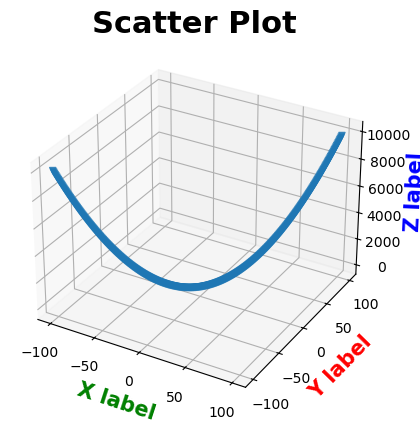

In [234]:
ax = plt.figure().add_subplot(projection='3d')
x=np.arange(-100,100,0.5)
y=np.arange(-100,100,0.5)
z=x*y
   # ax.scatter(xs, ys, zs, marker=5)

ax.scatter(x,y,z, marker="v",alpha=0.8)
ax.set_title("Scatter Plot",fontsize=22,weight='bold')
ax.set_xlabel('X label',fontsize=15,weight='bold',color='green')
ax.set_ylabel('Y label',fontsize=15,weight='bold',color='red')
ax.set_zlabel('Z label',fontsize=15,weight='bold',color='blue')
plt.show()




12.What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [237]:
dfzoneMax=dfzone.sort_values(by="VO2", ascending=False)
dfzoneMax=dfzoneMax[['ID','First Name','Last Name','sport','VO2']].drop_duplicates()
print('The Highest 3 V02 Maxes recorded')
dfzoneMax.head(3)


The Highest 3 V02 Maxes recorded


,ID,First Name,Last Name,sport,VO2
38093,13,Mia,Carpenter,kayak,4.576774
38176,13,Mia,Carpenter,kayak,4.099752
38178,13,Mia,Carpenter,kayak,3.951029


13.Calculate the year of birth of each athlete and store it as a column in the tables.

In [228]:
#Get the Birth year
#get current year
from datetime import date
cur_date=date.today()
year=cur_date.year
Atheletes['Birth Year']=Atheletes['age'].apply(lambda x:year - x)
Atheletes

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,BMI,Birth Year
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,0.002072,2009
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,0.002141,2009
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,0.002464,2008
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,0.002361,2008
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,0.002208,2007
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,0.002297,2007
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,0.001829,2009
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,0.001881,2009
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,0.001843,2010
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,0.001877,2010


14.What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [236]:
dfzoneMax=dfzone.sort_values(by="VO2", ascending=True)
dfzoneMax=dfzoneMax[['ID','First Name','Last Name','sport','VO2']].drop_duplicates()
print('The lowest 3 V02 Maxes recorded:')
dfzoneMax.head(3)

The lowest 3 V02 Maxes recorded:


,ID,First Name,Last Name,sport,VO2
22322,9,Chloe,Price,fencing,0.069354
22324,9,Chloe,Price,fencing,0.081389
25079,10,Lily,Jordan,fencing,0.122263


15.Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add 
    this as a column to every table:
Zone 1 (recovery/easy)       <100 HR max
Zone 2 (aerobic/base)        100-120 HR max
Zone 3 (tempo)        120-135 HR max
Zone 4 (lactate threshold)        135-155 HR max
Zone 5 (anaerobic)        155+ HR max and above
    

In [226]:
#HR rates calculation
df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
#df_excersizetype
df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
df_excersizetype

,ID,time,RR,VO2,power,ExType,HR,Zone Type
0,1,-130.840,672.0,0.302008,0,Warm Up,89.285714,Zone 1
1,1,-130.168,672.0,0.302008,0,Warm Up,89.285714,Zone 1
2,1,-129.536,632.0,0.301336,0,Warm Up,94.936709,Zone 1
3,1,-128.824,712.0,0.301336,0,Warm Up,84.269663,Zone 1
4,1,-127.948,876.0,0.301336,0,Warm Up,68.493151,Zone 1
...,...,...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down,111.940299,Zone 2
52058,18,947.816,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52059,18,948.344,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52060,18,948.884,540.0,0.507071,0,Cool Down,111.111111,Zone 2


16.Calculate the BMI of every athlete and display it as a list.

In [217]:
#BMI calculation
Atheletes['BMI']=Atheletes['Weight']/Atheletes['Height']**2
Atheletes


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,BMI
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,0.002072
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,0.002141
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,0.002464
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,0.002361
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,0.002208
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,0.002297
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,0.001829
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,0.001881
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,0.001843
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,0.001877
